# Regression Case Study
-  Data : Diamonds from sns
-  How variables affect DV
-  Extracted from Linked In post
    

In [1]:
#libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
#data 
df = sns.load_dataset('diamonds')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [3]:
df.head()

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

In [4]:
# take log of price
df['log_price'] = np.log(df['price'])
df.head(2)

carat      cut color clarity  depth  table  price     x     y     z  \
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43   
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31   

   log_price  
0   5.786897  
1   5.786897

In [5]:
#subset columns
df1 = df[['color','price','log_price']]
df1.tail(2)

color  price  log_price
53938     H   2757   7.921898
53939     D   2757   7.921898

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   color      53940 non-null  category
 1   price      53940 non-null  int64   
 2   log_price  53940 non-null  float64 
dtypes: category(1), float64(1), int64(1)
memory usage: 896.0 KB


In [7]:
df1.columns

Index(['color', 'price', 'log_price'], dtype='object')

In [8]:
df1.shape

(53940, 3)

In [9]:
df1.describe()
#high sd for price

price     log_price
count  53940.000000  53940.000000
mean    3932.799722      7.786768
std     3989.439738      1.014649
min      326.000000      5.786897
25%      950.000000      6.856462
50%     2401.000000      7.783641
75%     5324.250000      8.580027
max    18823.000000      9.842835

<Axes: ylabel='Frequency'>

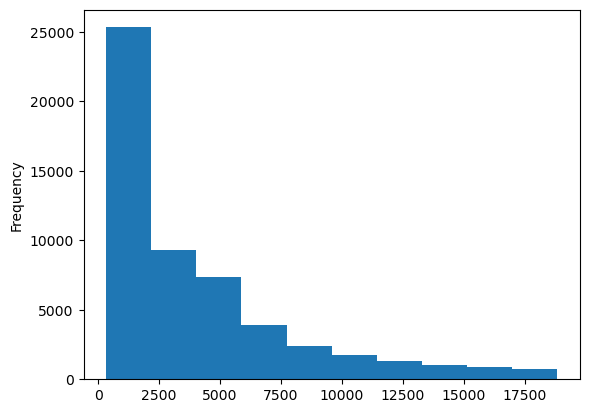

In [10]:
df1.price.plot(kind='hist')

<Axes: ylabel='Density'>

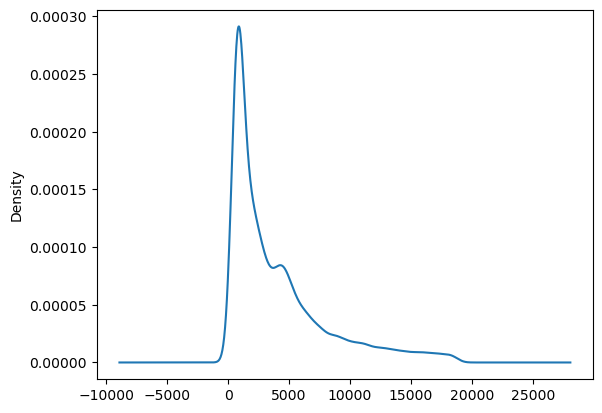

In [11]:
df1.price.plot(kind='kde')

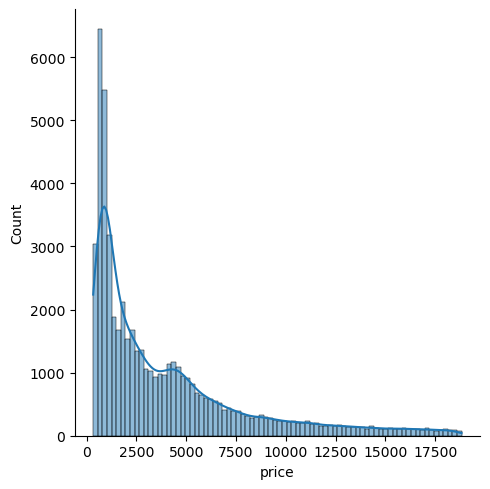

In [12]:
sns.displot(data=df1, x = 'price', kde = True)

In [ ]:
#missing values - Nil
df1.isnull().sum()

In [19]:
df1.head(3)

color  price  log_price
0     E    326   5.786897
1     E    326   5.786897
2     E    327   5.789960

In [29]:
colorCount = df1.color.value_counts().reset_index().rename(columns={'color':'count','index':'color'})
colorCount

color  count
0     G  11292
1     E   9797
2     F   9542
3     H   8304
4     D   6775
5     I   5422
6     J   2808

In [31]:
# Categorical Values 
fig = px.bar(colorCount, x='color',y='count' )
fig.show();

In [33]:
#df1.loc[df['pop'] < 2.e6, 'country'] = 'Other countries' # Represent only large countries
fig = px.pie(colorCount, names='color', values='count', title='Colors and their Count : Pie Chart')
fig.show();

In [48]:
# Mean price per color
meanPriceColor = df1.groupby(['color'], as_index=False)['price'].agg(np.mean)
print(meanPriceColor)
fig = px.bar(meanPriceColor, x='color',y='price', color='color', title='Mean Price per Color' )
fig.show();

  color        price
0     D  3169.954096
1     E  3076.752475
2     F  3724.886397
3     G  3999.135671
4     H  4486.669196
5     I  5091.874954
6     J  5323.818020


In [49]:
# box plot
fig = px.box(df1, x="color", y="price")
fig.show()

<Axes: xlabel='color', ylabel='price'>

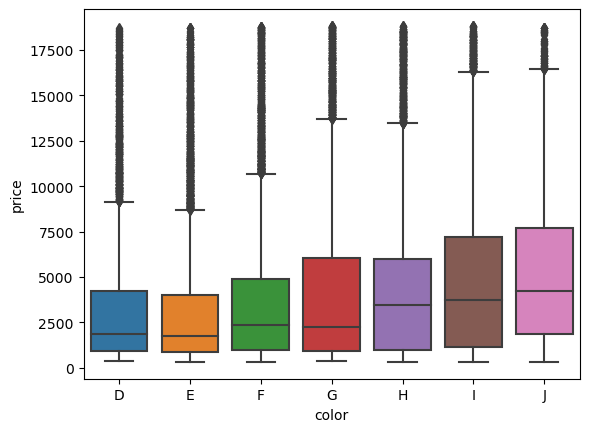

In [50]:
sns.boxplot(data=df1, x='color', y='price')

In [51]:
df1['price'].describe()

count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64

In [73]:
q1=df1[['price']].quantile(0.25)
q3=df1[['price']].quantile(0.75)
IQR=q3-q1
IQR, q1, q3

(price    4374.25
 dtype: float64,
 price    950.0
 Name: 0.25, dtype: float64,
 price    5324.25
 Name: 0.75, dtype: float64)

In [87]:
q1 - IQR, q3 + IQR

(price   -3424.25
 dtype: float64,
 price    9698.5
 dtype: float64)

In [70]:
#outliers.sum()

price        52898391.0
log_price           0.0
dtype: float64

In [85]:
df1.query('price < -3425')

Empty DataFrame
Columns: [color, price, log_price]
Index: []

In [88]:
df1.query('price > 9868')
#5355

color  price  log_price
21795     F   9870   9.197255
21796     D   9870   9.197255
21797     F   9870   9.197255
21798     G   9872   9.197458
21799     G   9873   9.197559
...     ...    ...        ...
27745     H  18803   9.841772
27746     G  18804   9.841825
27747     G  18806   9.841931
27748     G  18818   9.842569
27749     I  18823   9.842835

[5355 rows x 3 columns]

In [97]:
df1.loc[df1['price'] > 9868, :]

color  price  log_price
21795     F   9870   9.197255
21796     D   9870   9.197255
21797     F   9870   9.197255
21798     G   9872   9.197458
21799     G   9873   9.197559
...     ...    ...        ...
27745     H  18803   9.841772
27746     G  18804   9.841825
27747     G  18806   9.841931
27748     G  18818   9.842569
27749     I  18823   9.842835

[5355 rows x 3 columns]

In [98]:
df2 = df1.loc[df1['price'] <= 9868, :]
df2.shape

(48585, 3)

In [109]:
np.where(df1[(df1['price'] <= 9868)])

(array([    0,     0,     0, ..., 48584, 48584, 48584], dtype=int64),
 array([0, 1, 2, ..., 0, 1, 2], dtype=int64))

In [110]:
# Regression 
import statsmodels.api as st
from statsmodels.formula.api import ols

In [111]:
olsmodel = ols(formula ='log_price ~ C(color)', data=df1).fit()
# we wanted to treat explicitly as categorical, we could have done so by using the C() operator:

In [112]:
olsmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     237.8
Date:                Sun, 23 Jul 2023   Prob (F-statistic):          3.77e-301
Time:                        12:37:48   Log-Likelihood:                -76617.
No. Observations:               53940   AIC:                         1.532e+05
Df Residuals:                   53933   BIC:                         1.533e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         7.6169      0.012    625.984      0.000       7.593       7.641
C(color)[T.E]    -0.0375      0.016     -2.370      0.018      -0.069      -0.006
C(color)[T.F]     0.1455      0.016      9.146      0.000       0.114       0.177
C(color)[T.G]     0.1727      0.015     11.219      0.000       0.143       0.203
C(color)[T.H]     0.3015      0.016     18.390      0.000       0.269       0.334
C(color)[T.I]     0.4061      0.018     22.250      0.000       0.370       0.442
C(color)[T.J]     0.5291      0.022     23.537      0.000       0.485       0.573
==============================================================================
Omnibus:                    11794.122   Durbin-Watson:                   0.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2240.596
Skew:                           0.064   Prob(JB):                         0.00
Kurtosis:                       2.010   Cond. No.                         8.56
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [113]:
#anova
st.stats.anova_lm(olsmodel, type=2)

df        sum_sq    mean_sq           F         PR(>F)
C(color)      6.0   1431.255783  238.54263  237.807767  3.767555e-301
Residual  53933.0  54099.661516    1.00309         NaN            NaN

-  t test to state : mean is equal among 2 groups of data.
-  does color affect the price of diamong
-  p value tells if can reject Ho : p < .05 : Significant difference due to color -> Reject Ho : Color affect the mean price
-  F value tells how much color is affect the outcome (log_price)

In [114]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z', 'log_price'],
      dtype='object')

In [115]:
#add another column, ie cut 
df1 = df1.join(df['cut'])
df1.head(3)

color  price  log_price      cut
0     E    326   5.786897    Ideal
1     E    326   5.786897  Premium
2     E    327   5.789960     Good

<Axes: xlabel='cut', ylabel='log_price'>

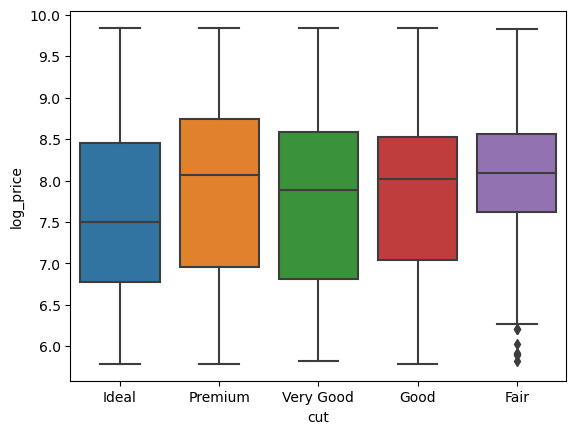

In [116]:
sns.boxplot(data=df1, x='cut', y='log_price')

<Axes: xlabel='cut', ylabel='count'>

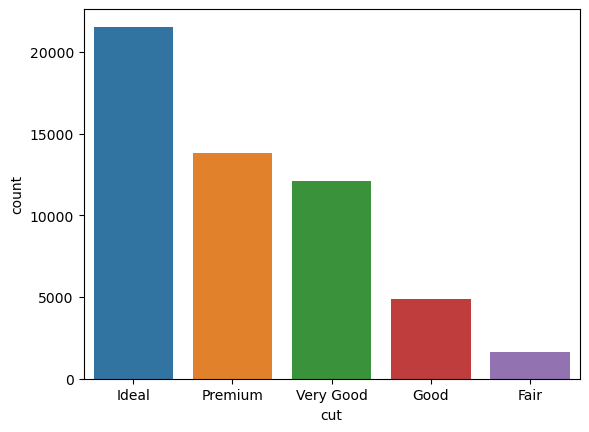

In [125]:
sns.barplot(data=df1.cut.value_counts().reset_index().rename(columns={'cut':'count','index':'cut'}), x='cut',y='count')

In [126]:
df1.groupby(['cut'], as_index=False)['log_price'].mean()

cut  log_price
0      Ideal   7.639467
1    Premium   7.950795
2  Very Good   7.798664
3       Good   7.842809
4       Fair   8.093441

<Axes: xlabel='cut', ylabel='log_price'>

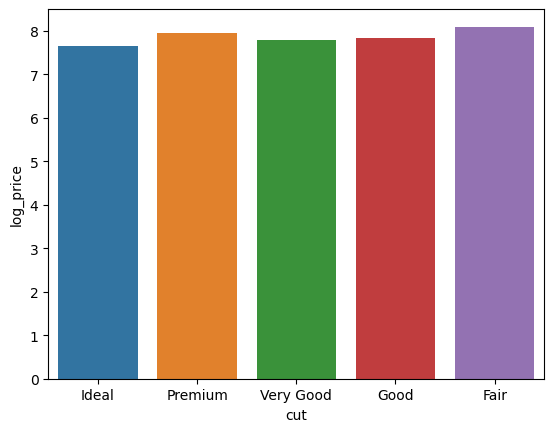

In [127]:
sns.barplot(data=df1.groupby(['cut'], as_index=False)['log_price'].mean(), x='cut',y='log_price')
#almost same with cut type

In [128]:
#second model
olsmodel2 = ols(formula = 'log_price ~ C(color) + C(cut) + C(color):C(cut)', data=df1).fit()

In [129]:
olsmodel2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     72.53
Date:                Sun, 23 Jul 2023   Prob (F-statistic):               0.00
Time:                        12:53:41   Log-Likelihood:                -76115.
No. Observations:               53940   AIC:                         1.523e+05
Df Residuals:                   53905   BIC:                         1.526e+05
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                             7.4567      0.019    399.952      0.000       7.420       7.493
C(color)[T.E]                        -0.0056      0.024     -0.230      0.818      -0.054       0.042
C(color)[T.F]                         0.1755      0.025      7.136      0.000       0.127       0.224
C(color)[T.G]                         0.2352      0.023     10.035      0.000       0.189       0.281
C(color)[T.H]                         0.2756      0.026     10.695      0.000       0.225       0.326
C(color)[T.I]                         0.3787      0.029     13.240      0.000       0.323       0.435
C(color)[T.J]                         0.5457      0.038     14.345      0.000       0.471       0.620
C(cut)[T.Premium]                     0.2828      0.031      9.116      0.000       0.222       0.344
C(cut)[T.Very Good]                   0.2295      0.032      7.261      0.000       0.168       0.291
C(cut)[T.Good]                        0.2675      0.043      6.243      0.000       0.184       0.351
C(cut)[T.Fair]                        0.6610      0.080      8.268      0.000       0.504       0.818
C(color)[T.E]:C(cut)[T.Premium]      -0.0322      0.040     -0.797      0.426      -0.112       0.047
C(color)[T.F]:C(cut)[T.Premium]       0.0313      0.041      0.772      0.440      -0.048       0.111
C(color)[T.G]:C(cut)[T.Premium]      -0.0656      0.039     -1.695      0.090      -0.142       0.010
C(color)[T.H]:C(cut)[T.Premium]       0.0947      0.041      2.299      0.022       0.014       0.175
C(color)[T.I]:C(cut)[T.Premium]       0.0841      0.046      1.824      0.068      -0.006       0.174
C(color)[T.J]:C(cut)[T.Premium]       0.0610      0.057      1.065      0.287      -0.051       0.173
C(color)[T.E]:C(cut)[T.Very Good]    -0.0931      0.041     -2.284      0.022      -0.173      -0.013
C(color)[T.F]:C(cut)[T.Very Good]    -0.1013      0.041     -2.449      0.014      -0.182      -0.020
C(color)[T.G]:C(cut)[T.Very Good]    -0.1590      0.040     -3.941      0.000      -0.238      -0.080
C(color)[T.H]:C(cut)[T.Very Good]    -0.0247      0.043     -0.574      0.566      -0.109       0.060
C(color)[T.I]:C(cut)[T.Very Good]     0.0359      0.048      0.750      0.453      -0.058       0.130
C(color)[T.J]:C(cut)[T.Very Good]    -0.0979      0.060     -1.644      0.100      -0.215       0.019
C(color)[T.E]:C(cut)[T.Good]         -0.0112      0.056     -0.201      0.841      -0.121       0.099
C(color)[T.F]:C(cut)[T.Good]         -0.1196      0.056     -2.122      0.034      -0.230      -0.009
C(color)[T.G]:C(cut)[T.Good]         -0.0453      0.056     -0.805      0.421      -0.156       0.065
C(color)[T.H]:C(cut)[T.Good]         -0.1066      0.060     -1.788      0.074      -0.223       0.010
C(color)[T.I]:C(cut)[T.

## hypothesis setting
- Color
    -  Ho : No difference in price due to color, Ha : Difference in price due to color
- Cut
    -  Ho : No difference in price due to cut, Ha : Difference in price due to cut
-  Color + Cut Interaction/ Combination
    -  Ho : No difference in price due to cut & color, Ha : Difference in price due to cut & color



In [130]:
st.stats.anova_lm(olsmodel2, type=2)

df        sum_sq     mean_sq           F         PR(>F)
C(color)             6.0   1431.255783  238.542630  242.151273  1.206538e-306
C(cut)               4.0    901.918331  225.479583  228.890609  3.250547e-195
C(color):C(cut)     24.0     96.058742    4.002448    4.062996   8.168980e-11
Residual         53905.0  53101.684443    0.985098         NaN            NaN

In [131]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [132]:
tukeyhsd = pairwise_tukeyhsd(endog = df1['log_price'], groups = df1['color'], alpha = .05)

In [133]:
tukeyhsd.summary()
# Reject Column
##  True - Reject Ho in favour of Ha
##  False - Accept Ho

<class 'statsmodels.iolib.table.SimpleTable'>

## Ho
-  Ho : No Difference in price due to colors only
    -  D & E
    -  F & G
-  Rest have difference in prices due to colors

In [134]:
# add carat to the model
df1 = df1.join(df['carat'])
df1.head()

color  price  log_price      cut  carat
0     E    326   5.786897    Ideal   0.23
1     E    326   5.786897  Premium   0.21
2     E    327   5.789960     Good   0.23
3     I    334   5.811141  Premium   0.29
4     J    335   5.814131     Good   0.31

In [135]:
olsmodel3 = ols('log_price ~ C(color) + carat', df1).fit()
olsmodel3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                 4.941e+04
Date:                Sun, 23 Jul 2023   Prob (F-statistic):               0.00
Time:                        13:03:35   Log-Likelihood:                -23296.
No. Observations:               53940   AIC:                         4.661e+04
Df Residuals:                   53932   BIC:                         4.668e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         6.2620      0.005   1228.703      0.000       6.252       6.272
C(color)[T.E]    -0.0376      0.006     -6.393      0.000      -0.049      -0.026
C(color)[T.F]    -0.0167      0.006     -2.810      0.005      -0.028      -0.005
C(color)[T.G]    -0.0609      0.006    -10.605      0.000      -0.072      -0.050
C(color)[T.H]    -0.2216      0.006    -35.935      0.000      -0.234      -0.210
C(color)[T.I]    -0.3543      0.007    -51.218      0.000      -0.368      -0.341
C(color)[T.J]    -0.5098      0.009    -59.587      0.000      -0.527      -0.493
carat             2.0598      0.004    579.260      0.000       2.053       2.067
==============================================================================
Omnibus:                    15058.163   Durbin-Watson:                   0.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           132330.153
Skew:                          -1.094   Prob(JB):                         0.00
Kurtosis:                      10.355   Cond. No.                         11.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [136]:
#ancova
ancova_table = st.stats.anova_lm(olsmodel3, type=2)
ancova_table

df        sum_sq       mean_sq              F  PR(>F)
C(color)      6.0   1431.255783    238.542630    1717.314116     0.0
carat         1.0  46608.264906  46608.264906  335541.832021     0.0
Residual  53932.0   7491.396610      0.138904            NaN     NaN

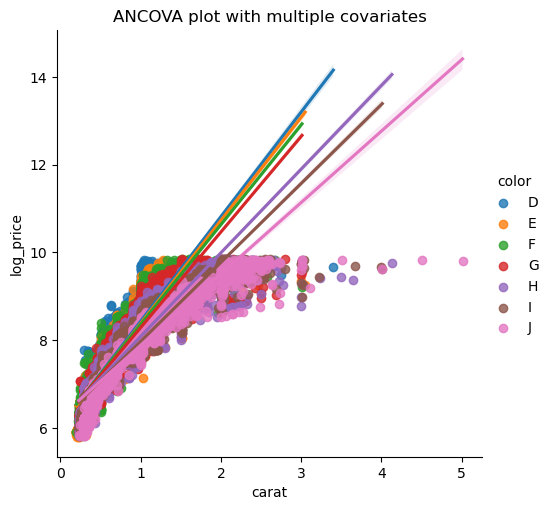

In [138]:
sns.lmplot(data = df1, x='carat', y='log_price', hue='color').set(title = 'ANCOVA plot with multiple covariates')

In [141]:
#!pip install pingouin
from pingouin import ancova

In [142]:
ancova(data=df1, dv='log_price', covar='carat', between='color')

Source            SS     DF              F  p-unc       np2
0     color   1017.040373      6    1220.311429    0.0  0.119533
1     carat  46608.264906      1  335541.832021    0.0  0.861526
2  Residual   7491.396610  53932            NaN    NaN       NaN

### Ancova summary
-   p-unc (uncorrected) < .05,-> Reject Ho that each color results in same avg log_price even after controlling carat variable
-   Conclude that color itself affect the price of diamong

In [143]:
df1.groupby('color')['log_price'].describe()

count      mean       std       min       25%       50%       75%  \
color                                                                        
D       6775.0  7.616905  0.926359  5.877736  6.814543  7.516433  8.346049   
E       9797.0  7.579405  0.925420  5.786897  6.782192  7.461066  8.294799   
F       9542.0  7.762440  0.967514  5.834811  6.889591  7.759401  8.490490   
G      11292.0  7.789583  1.027715  5.869297  6.836259  7.715124  8.707483   
H       8304.0  7.918446  1.063218  5.820083  6.891626  8.149023  8.696218   
I       5422.0  8.022962  1.105842  5.811141  7.021530  8.224164  8.882079   
J       2808.0  8.145970  1.038166  5.814131  7.528600  8.350902  8.948326   

            max  
color            
D      9.835904  
E      9.837935  
F      9.841133  
G      9.842569  
H      9.841772  
I      9.842835  
J      9.836813

In [144]:
df1.groupby('color')['carat'].describe()

count      mean       std   min   25%   50%    75%   max
color                                                            
D       6775.0  0.657795  0.359573  0.20  0.36  0.53  0.905  3.40
E       9797.0  0.657867  0.368566  0.20  0.36  0.53  0.900  3.05
F       9542.0  0.736538  0.397588  0.20  0.40  0.70  1.010  3.01
G      11292.0  0.771190  0.441436  0.23  0.39  0.70  1.040  3.01
H       8304.0  0.911799  0.521236  0.23  0.41  0.90  1.200  4.13
I       5422.0  1.026927  0.579173  0.23  0.52  1.00  1.500  4.01
J       2808.0  1.162137  0.595801  0.23  0.71  1.11  1.520  5.01

<Axes: xlabel='color', ylabel='carat'>

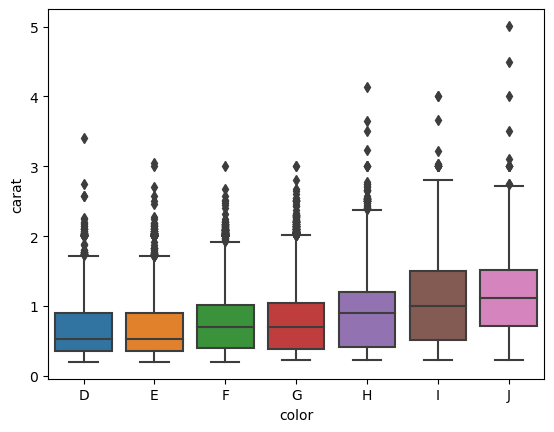

In [146]:
sns.boxplot(data=df1, x='color', y='carat')
#outliers seen

<Axes: >

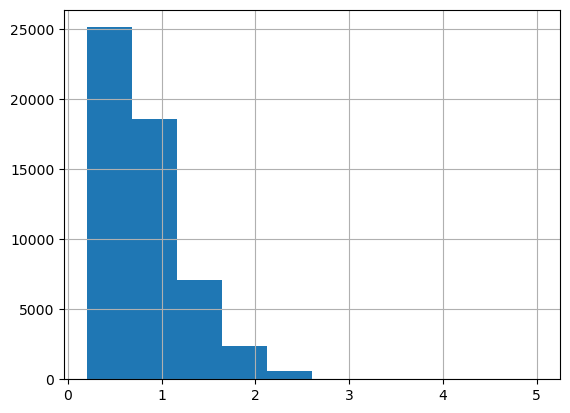

In [147]:
df1.carat.hist()

In [148]:
# MANOVA
from statsmodels.multivariate.manova import MANOVA
fit = MANOVA.from_formula('log_price + carat ~ color', data =df1)
print(fit.mv_test())

                     Multivariate linear model
                                                                    
--------------------------------------------------------------------
       Intercept         Value  Num DF   Den DF     F Value   Pr > F
--------------------------------------------------------------------
          Wilks' lambda  0.0272 2.0000 53932.0000 963484.1583 0.0000
         Pillai's trace  0.9728 2.0000 53932.0000 963484.1583 0.0000
 Hotelling-Lawley trace 35.7296 2.0000 53932.0000 963484.1583 0.0000
    Roy's greatest root 35.7296 2.0000 53932.0000 963484.1583 0.0000
--------------------------------------------------------------------
                                                                    
--------------------------------------------------------------------
          color          Value   Num DF    Den DF    F Value  Pr > F
--------------------------------------------------------------------
           Wilks' lambda 0.7981 12.0000 107864.0000 1072

In [ ]:
# p value < .005 
# strong association between color & caret + log_price 

In [149]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as lda

In [167]:
sampleDF1 = df1.sample(n=100, random_state=32190).reset_index()
sampleDF1.shape

(100, 6)

In [168]:
sampleDF1.head(2)

index color  price  log_price        cut  carat
0  24203     J  12392   9.424806  Very Good   2.01
1  28618     E    675   6.514713       Good   0.30

In [169]:
X = sampleDF1[['log_price', 'carat']]
y = sampleDF1['color']
X.shape, y.shape

((100, 2), (100,))

In [170]:
sampleDF1.isnull().sum()

index        0
color        0
price        0
log_price    0
cut          0
carat        0
dtype: int64

In [176]:
X_ne = pd.DataFrame(lda().fit(X=X, y=y).transform(X), columns=['lda1', 'lda2'])

In [177]:
X_ne.head()

lda1      lda2
0 -3.014954 -1.704092
1 -0.451501  1.226778
2 -1.491537 -1.512171
3 -0.720160 -1.289277
4  0.836033 -0.198351

In [178]:
X_ne['color'] = sampleDF1[['color']]
X_ne.head(2)

lda1      lda2 color
0 -3.014954 -1.704092     J
1 -0.451501  1.226778     E

<Axes: xlabel='lda1', ylabel='lda2'>

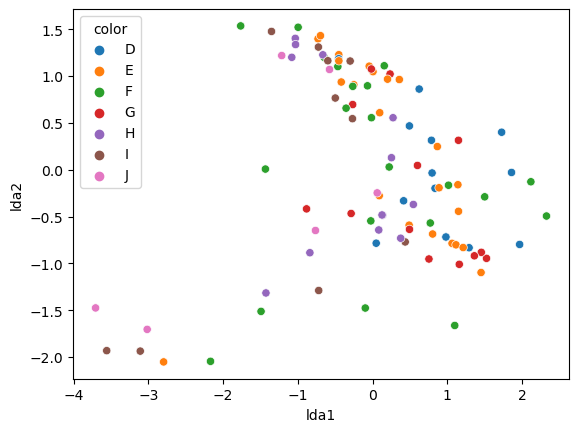

In [180]:
sns.scatterplot(data= X_ne, x='lda1', y='lda2', hue='color')

# End here